<a href="https://colab.research.google.com/github/D9665IPAk880/Applied-Statistics-project-/blob/main/Er_Dipak_Applied_Statistics_Project_ipyn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Customer Purchase Behavior Analysis using Descriptive Statistics

##Problem Statement

🔍 **Problem Statement**:

Welcome to the Probability and Statistics project! 📊🔍 In this exciting journey, you'll get the chance to apply the concepts you've learned in probability theory and statistics to analyze a real-world dataset. This project is your opportunity to dive deep into the world of data analysis and gain practical experience with the tools and techniques you've been learning. 🚀

🎯 **Objective**:

Your mission is to analyze the provided dataset containing customer information and purchasing behavior to make informed decisions. Your goal is to identify patterns, trends, and correlations that will help your company optimize its marketing efforts and increase offer acceptance rates. 🎉

##About the Dataset



Here's the link to the [dataset](https://docs.google.com/spreadsheets/d/12ln9iTNcVNOMYi_AU-OczKpa_KIP8XyVbsjk81Na8Yk/edit?usp=sharing)


This data was gathered during last year's campaign.
Data description is as follows;

1. Response (target) - 1 if customer accepted the offer in the last campaign, 0 otherwise
1. ID - Unique ID of each customer
1. Year_Birth - Age of the customer
1. Complain - 1 if the customer complained in the last 2 years
1. Dt_Customer - date of customer's enrollment with the company
1. Education - customer's level of education
1. Marital - customer's marital status
1. Kidhome - number of small children in customer's household
1. Teenhome - number of teenagers in customer's household
1. Income - customer's yearly household income
1. MntFishProducts - the amount spent on fish products in the last 2 years
1. MntMeatProducts - the amount spent on meat products in the last 2 years
1. MntFruits - the amount spent on fruits products in the last 2 years
1. MntSweetProducts - amount spent on sweet products in the last 2 years
1. MntWines - the amount spent on wine products in the last 2 years
1. MntGoldProds - the amount spent on gold products in the last 2 years
1. NumDealsPurchases - number of purchases made with discount
1. NumCatalogPurchases - number of purchases made using catalog (buying goods to be shipped through the mail)
1. NumStorePurchases - number of purchases made directly in stores
1. NumWebPurchases - number of purchases made through the company's website
1. NumWebVisitsMonth - number of visits to company's website in the last month
1. Recency - number of days since the last purchase





In [47]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [48]:
# First of all we import some basic usefull libraries for our dataset process work.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
import statistics

In [49]:
# Now we will get our dataset in colab by the use of pandas library.
df = pd.read_excel('/content/Superstore Marketing Data (1).xlsx')

In [50]:
# Information about the dataset.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 22 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Id                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

##Task 1 - Basic CleanUp

- **Clean and preprocess the dataset (handling missing values, data types, etc.).**

- **Analyze the distribution of customer demographics (age, education, marital status) using descriptive statistics and visualizations.**

In [51]:
# Remove Dt_Customer and Id because these are irrelevant we drop the columns from dataset
df.drop(columns ='Id', inplace = True)
df.drop(columns ='Dt_Customer', inplace = True)

In [52]:
# We will add a new column for age in this dataset
df["age"] = 2023- df["Year_Birth"]

In [53]:
# To fill the blank and null values
df.fillna(method='ffill', inplace=True)

In [54]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 21 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Year_Birth           2240 non-null   int64  
 1   Education            2240 non-null   object 
 2   Marital_Status       2240 non-null   object 
 3   Income               2240 non-null   float64
 4   Kidhome              2240 non-null   int64  
 5   Teenhome             2240 non-null   int64  
 6   Recency              2240 non-null   int64  
 7   MntWines             2240 non-null   int64  
 8   MntFruits            2240 non-null   int64  
 9   MntMeatProducts      2240 non-null   int64  
 10  MntFishProducts      2240 non-null   int64  
 11  MntSweetProducts     2240 non-null   int64  
 12  MntGoldProds         2240 non-null   int64  
 13  NumDealsPurchases    2240 non-null   int64  
 14  NumWebPurchases      2240 non-null   int64  
 15  NumCatalogPurchases  2240 non-null   i

In [55]:
# Changing in different types which are form of single to single
df['Marital_Status'] = df['Marital_Status'].replace(['YOLO', 'Alone'], 'Single')

In [56]:
# we will make a sub dataset from our original dataset for age, marriage status and education.
df2 = pd.DataFrame().assign(age=df['age'], Marital_Status=df['Marital_Status'], Education=df['Education'])
print(df2.head())

   age Marital_Status   Education
0   53       Divorced  Graduation
1   62         Single  Graduation
2   65        Married  Graduation
3   56       Together  Graduation
4   34         Single  Graduation


In [57]:
# discriptive statics od the data.
df2.describe()


age
count  2240.000000
mean     54.194196
std      11.984069
min      27.000000
25%      46.000000
50%      53.000000
75%      64.000000
max     130.000000

In [58]:
print("sum is")
print(df2.sum())

sum is
age                                                          121395
Marital_Status    DivorcedSingleMarriedTogetherSingleSingleMarri...
Education         GraduationGraduationGraduationGraduationGradua...
dtype: object


In [59]:
print("mode of data is")
print(df2.mode())


mode of data is
   age Marital_Status   Education
0   47        Married  Graduation


In [60]:
df2.head()

age Marital_Status   Education
0   53       Divorced  Graduation
1   62         Single  Graduation
2   65        Married  Graduation
3   56       Together  Graduation
4   34         Single  Graduation

In [61]:
print("median of data is")
print(df2["age"].median())

median of data is
53.0


<function matplotlib.pyplot.show(close=None, block=None)>

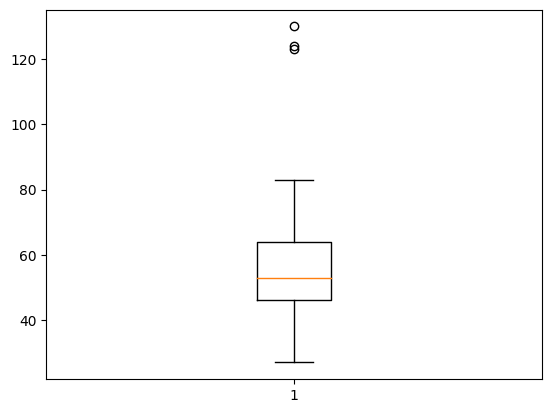

In [62]:
plt.boxplot(df2["age"])
plt.show

([<matplotlib.patches.Wedge at 0x7e1cccd96e30>,
 [Text(-0.010799092464652335, 1.099946989450828, 'Graduation'),
  Text(-0.840441051704004, -0.7096892549635142, 'PhD'),
  Text(0.3574766803682644, -1.0402934311976049, 'Master'),
  Text(0.9970110351959686, -0.4647246450291434, '2n Cycle'),
  Text(1.09684684539309, -0.08322858734369598, 'Basic')],
 [Text(-0.005890414071628546, 0.5999710851549971, '50.3%\n1127'),
  Text(-0.45842239183854755, -0.38710322998009866, '21.7%\n486'),
  Text(0.1949872802008715, -0.567432780653239, '16.5%\n370'),
  Text(0.5438242010159828, -0.2534861700158964, '9.1%\n203'),
  Text(0.59828009748714, -0.04539741127837962, '2.4%\n54')])

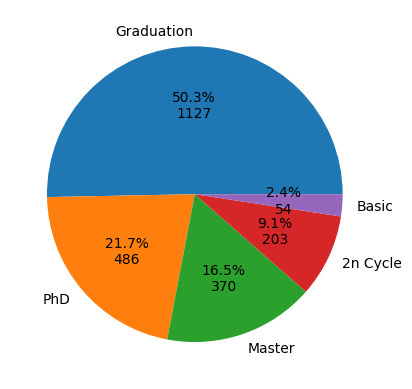

In [63]:
total = df2['Education'].value_counts().values.sum()

def fmt(x):
    return '{:.1f}%\n{:.0f}'.format(x, total*x/100)
plt.pie(df2['Education'].value_counts().values, labels=df2['Education'].value_counts().index, autopct=fmt)


([<matplotlib.patches.Wedge at 0x7e1cc1d4cb80>,
 [Text(0.38651228445009445, 1.0298583659752294, 'Married'),
  Text(-1.095001320486733, -0.10474783115802916, 'Together'),
  Text(0.02005458754524563, -1.0998171727693609, 'Single'),
  Text(0.9395126430415305, -0.5721153673561985, 'Divorced'),
  Text(1.0929096213923375, -0.12469386299276299, 'Widow'),
  Text(1.0999956725742956, -0.0030855012272427004, 'Absurd')],
 [Text(0.21082488242732422, 0.5617409268955796, '38.6%\n864'),
  Text(-0.597273447538218, -0.05713518063165226, '25.9%\n580'),
  Text(0.010938865933770343, -0.5999002760560149, '21.7%\n485'),
  Text(0.5124614416590166, -0.3120629276488355, '10.4%\n232'),
  Text(0.5961325207594567, -0.06801483435968889, '3.4%\n77'),
  Text(0.5999976395859793, -0.001683000669405109, '0.1%\n2')])

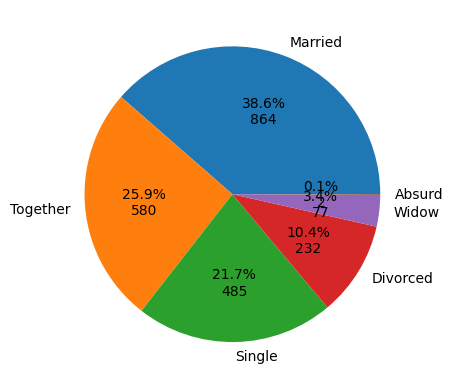

In [64]:
total = df2['Marital_Status'].value_counts().values.sum()

def fmt(x):
    return '{:.1f}%\n{:.0f}'.format(x, total*x/100)
plt.pie(df2['Marital_Status'].value_counts().values, labels=df2['Marital_Status'].value_counts().index, autopct=fmt)




**Deliverables**:

- **Cleaned and Preprocessed Dataset**:

  Provide a detailed report on the steps taken to handle missing values, including imputation methods used if applicable.
  Document the process of ensuring consistent data types for each variable, addressing any inconsistencies.

- **Summary of Basic Statistics**:

  Present calculated statistics such as mean, median, variance, and standard deviation for each relevant numerical variable.
  Include a concise table or summary showcasing these measures for easy reference.

##Task 2 - Descriptive Statistics 📊

- **Calculate measures of central tendency (mean, median, mode) and measures of dispersion (variance, standard deviation) for key variables. Identify and handle outliers if necessary.**


In [65]:
df.head(2)

Year_Birth   Education Marital_Status   Income  Kidhome  Teenhome  Recency  \
0        1970  Graduation       Divorced  84835.0        0         0        0   
1        1961  Graduation         Single  57091.0        0         0        0   

   MntWines  MntFruits  MntMeatProducts  ...  MntSweetProducts  MntGoldProds  \
0       189        104              379  ...               189           218   
1       464          5               64  ...                 0            37   

   NumDealsPurchases  NumWebPurchases  NumCatalogPurchases  NumStorePurchases  \
0                  1                4                    4                  6   
1                  1                7                    3                  7   

   NumWebVisitsMonth  Response  Complain  age  
0                  1         1         0   53  
1                  5         1         0   62  

[2 rows x 21 columns]

In [66]:
# we will make a new sub dataframe from main dataset of key variance present in dataset
df3 = pd.DataFrame().assign(age=df2['age'], Income=df['Income'], MntMeatProducts=df['MntMeatProducts'], MntSweetProducts=df['MntSweetProducts'], NumWebPurchases=df['NumWebPurchases'], NumCatalogPurchases=df['NumCatalogPurchases'])
df3.head()


age   Income  MntMeatProducts  MntSweetProducts  NumWebPurchases  \
0   53  84835.0              379               189                4   
1   62  57091.0               64                 0                7   
2   65  67267.0               59                 2                3   
3   56  32474.0                1                 0                1   
4   34  21474.0               24                 0                3   

   NumCatalogPurchases  
0                    4  
1                    3  
2                    2  
3                    0  
4                    1

In [67]:
# By this sub dataset we will calculate measures of central tendency
mean_df = df3.mean()
median_df = df3.median()
mode_df = df3.mode()

In [68]:
# now we calculate despersion in data
variance_df = df3.var()

std_dev_df = df3.std()

In [69]:
print(f"Mean of data: {mean_df}")

print(f"Median of data: {median_df}")

print(f"Mode of data: {mode_df}")

print(f"Variance of data: {variance_df}")

print(f"Standard Deviation of data: {std_dev_df}")

Mean of data: age                       54.194196
Income                 52180.624554
MntMeatProducts          166.950000
MntSweetProducts          27.062946
NumWebPurchases            4.084821
NumCatalogPurchases        2.662054
dtype: float64
Median of data: age                       53.0
Income                 51301.0
MntMeatProducts           67.0
MntSweetProducts           8.0
NumWebPurchases            4.0
NumCatalogPurchases        2.0
dtype: float64
Mode of data:    age  Income  MntMeatProducts  MntSweetProducts  NumWebPurchases  \
0   47  7500.0                7                 0                2   

   NumCatalogPurchases  
0                    0  
Variance of data: age                    1.436179e+02
Income                 6.315064e+08
MntMeatProducts        5.094743e+04
MntSweetProducts       1.704080e+03
NumWebPurchases        7.721252e+00
NumCatalogPurchases    8.544517e+00
dtype: float64
Standard Deviation of data: age                       11.984069
Income              

In [70]:
# Let's check the outlier's present in data and settle them
Q1 = df3.quantile(0.25)
Q3 = df3.quantile(0.75)
IQR = Q3 - Q1

# Identify potential outliers
outliers = df3[(df3 < Q1 - 1.5 * IQR) | (df3 > Q3 + 1.5 * IQR)]


In [71]:
print(outliers)

      age  Income  MntMeatProducts  MntSweetProducts  NumWebPurchases  \
0     NaN     NaN              NaN             189.0              NaN   
1     NaN     NaN              NaN               NaN              NaN   
2     NaN     NaN              NaN               NaN              NaN   
3     NaN     NaN              NaN               NaN              NaN   
4     NaN     NaN              NaN               NaN              NaN   
...   ...     ...              ...               ...              ...   
2235  NaN     NaN              NaN               NaN              NaN   
2236  NaN     NaN              NaN               NaN              NaN   
2237  NaN     NaN              NaN               NaN              NaN   
2238  NaN     NaN            701.0             165.0              NaN   
2239  NaN     NaN              NaN               NaN              NaN   

      NumCatalogPurchases  
0                     NaN  
1                     NaN  
2                     NaN  
3          

In [72]:
# Remove outliers
df_no_outliers = df3[(df3 >= Q1 - 1.5 * IQR) & (df3 <= Q3 + 1.5 * IQR)]

print(df_no_outliers)

       age   Income  MntMeatProducts  MntSweetProducts  NumWebPurchases  \
0     53.0  84835.0            379.0               NaN              4.0   
1     62.0  57091.0             64.0               0.0              7.0   
2     65.0  67267.0             59.0               2.0              3.0   
3     56.0  32474.0              1.0               0.0              1.0   
4     34.0  21474.0             24.0               0.0              3.0   
...    ...      ...              ...               ...              ...   
2235  47.0  66476.0            126.0              48.0              5.0   
2236  46.0  31056.0             13.0               8.0              1.0   
2237  47.0  46310.0             88.0               5.0              6.0   
2238  45.0  65819.0              NaN               NaN              5.0   
2239  54.0  94871.0            553.0               0.0              8.0   

      NumCatalogPurchases  
0                     4.0  
1                     3.0  
2              

**Deliverables**:

- **Descriptive statistics that reveal the central tendencies, variations, and potential outliers in the dataset.**:

  

## Task 3 - Probability Distributions 🎲

- **Identify variables that could follow specific probability distributions (e.g., Binomial, Normal). Calculate probabilities and expected values based on these distributions.**



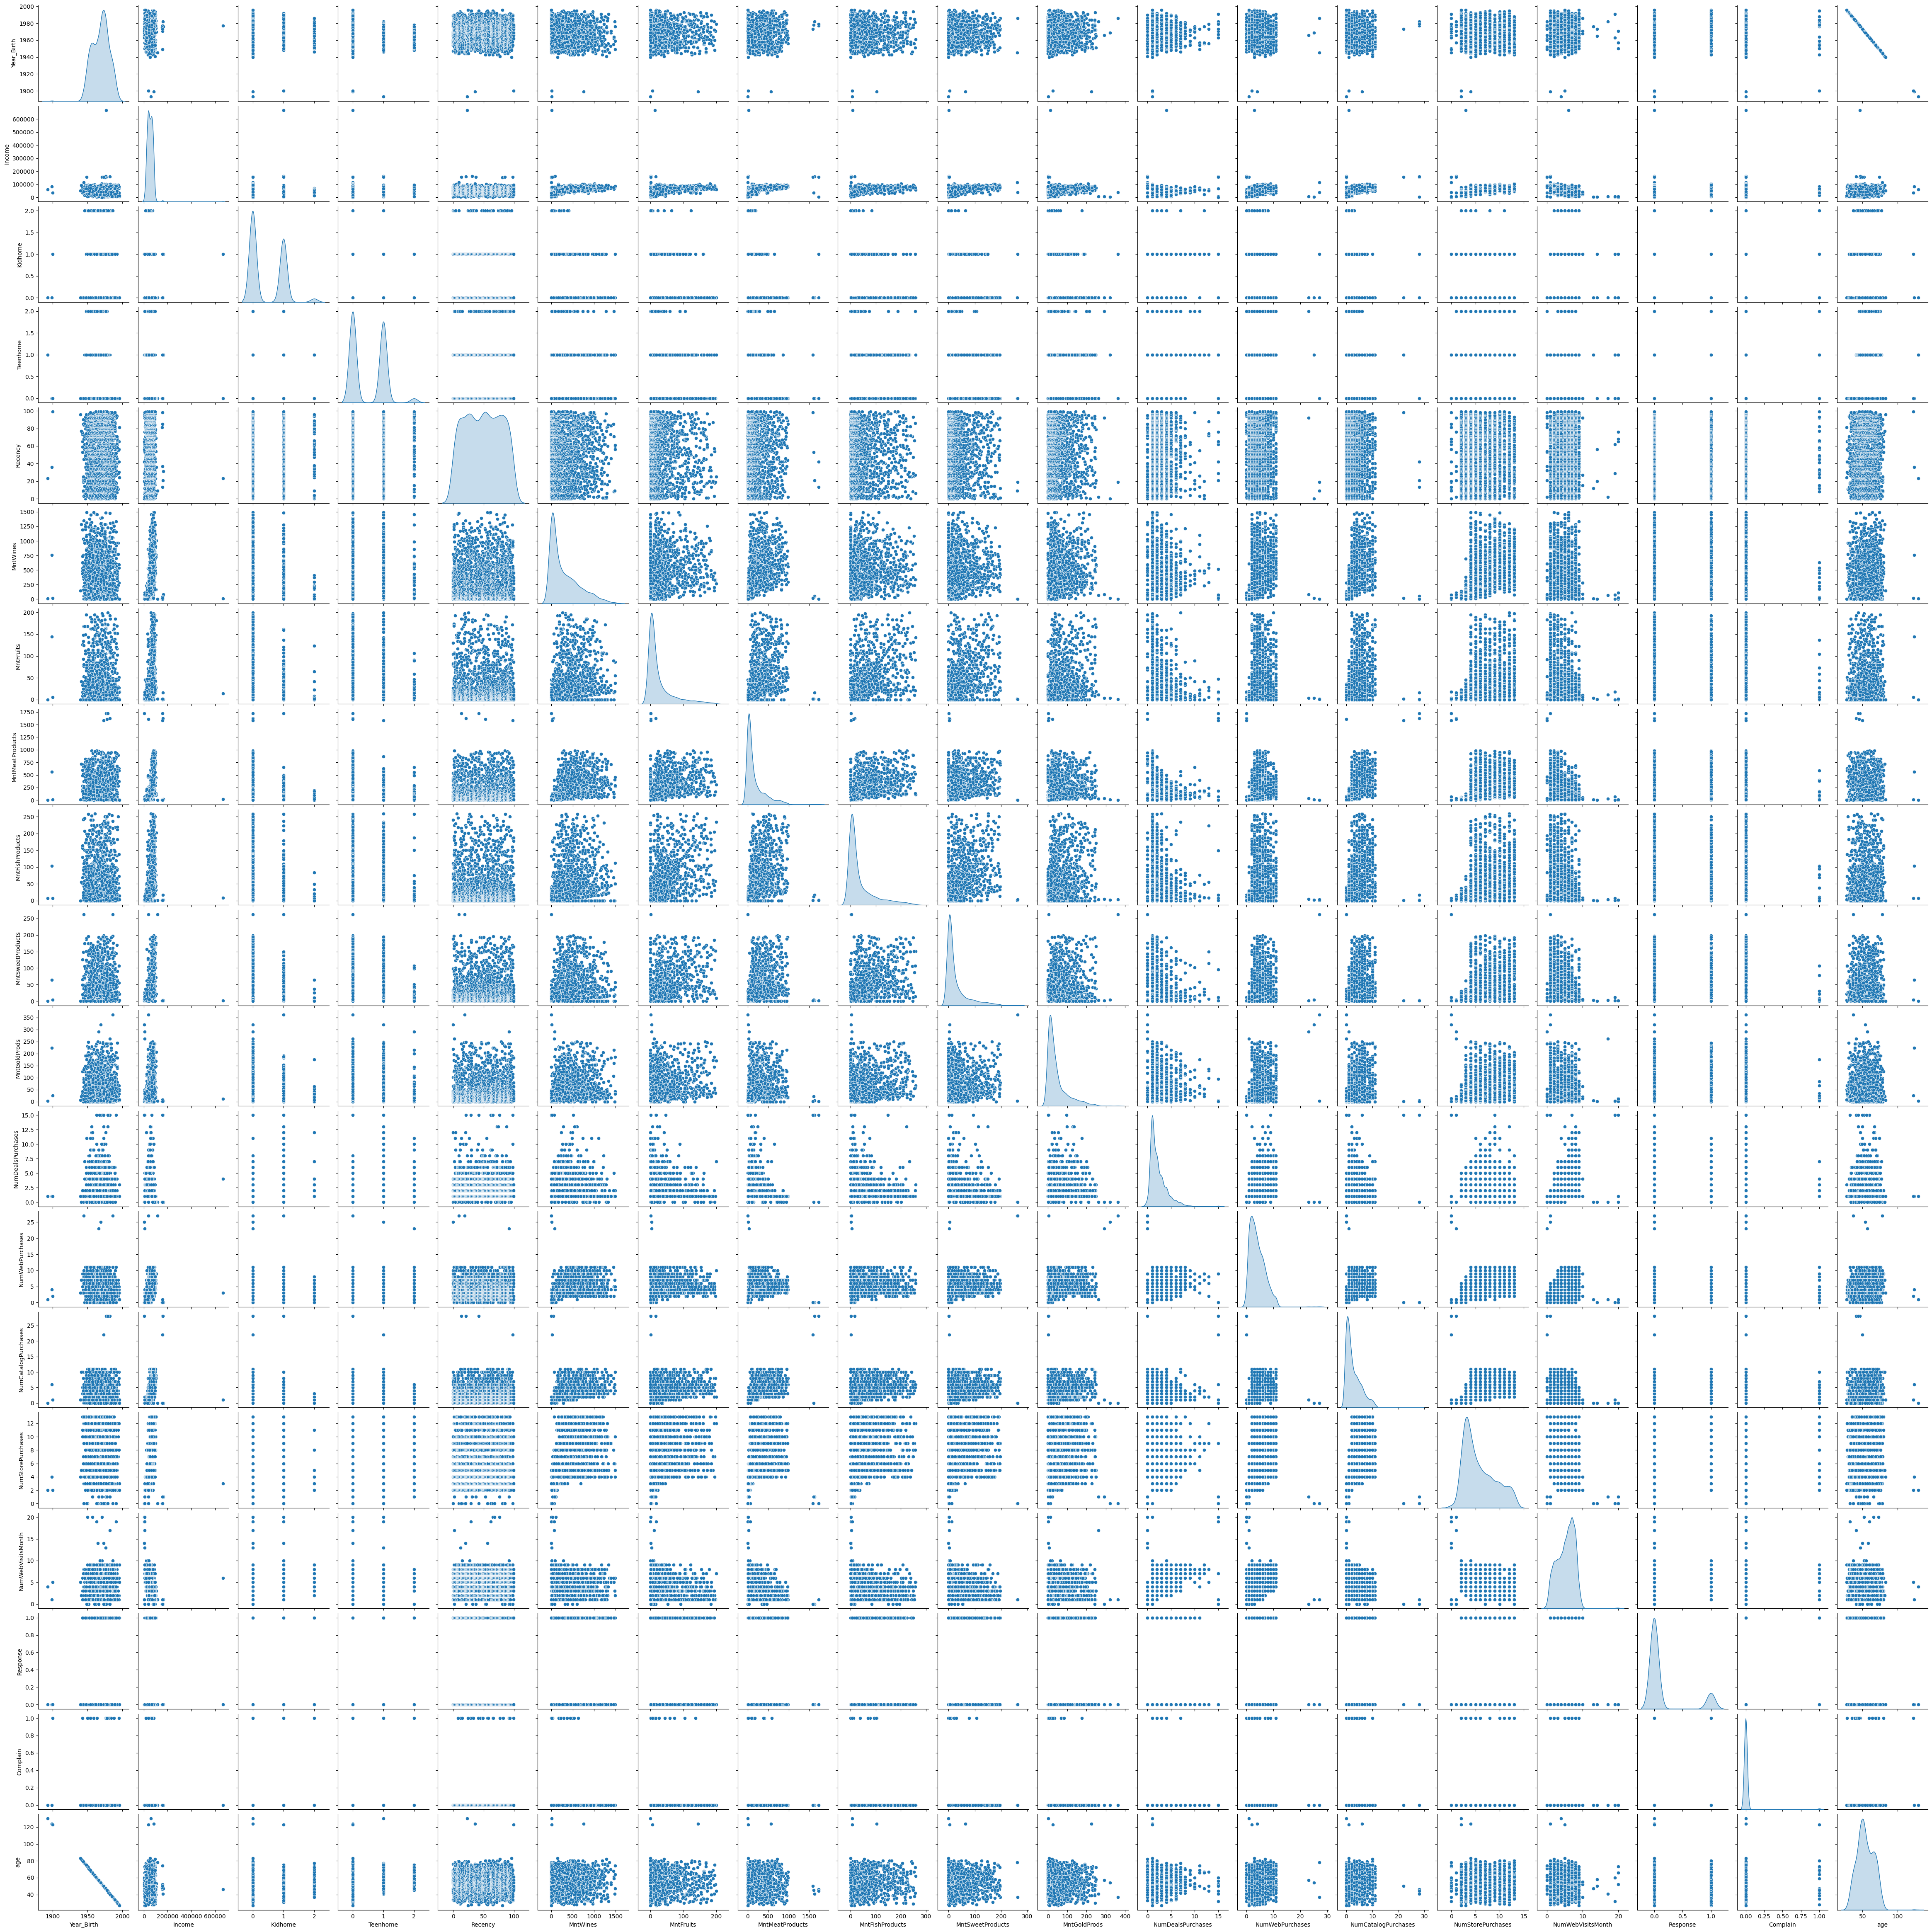

In [73]:
sns.pairplot(df,diag_kind='kde')

In [74]:
# lets take out the probability of customer's through their response on capaign products and the complaint made against the product
n = len(df)
proba_resp = (df['Response'] == int(1)).sum()/n
proba_compl = (df['Complain'] == int(1)).sum()/n

In [75]:
# The customer's are not responding well in campaign of new product's.
# so we have to do some change in campaign template or sales so the customer is to like the our campaign product
proba_resp

0.14910714285714285

In [76]:
# This is a good news that the complaint's against our product is less than 1%.
# It will help in gaining trust from our customer's
proba_compl

0.009375

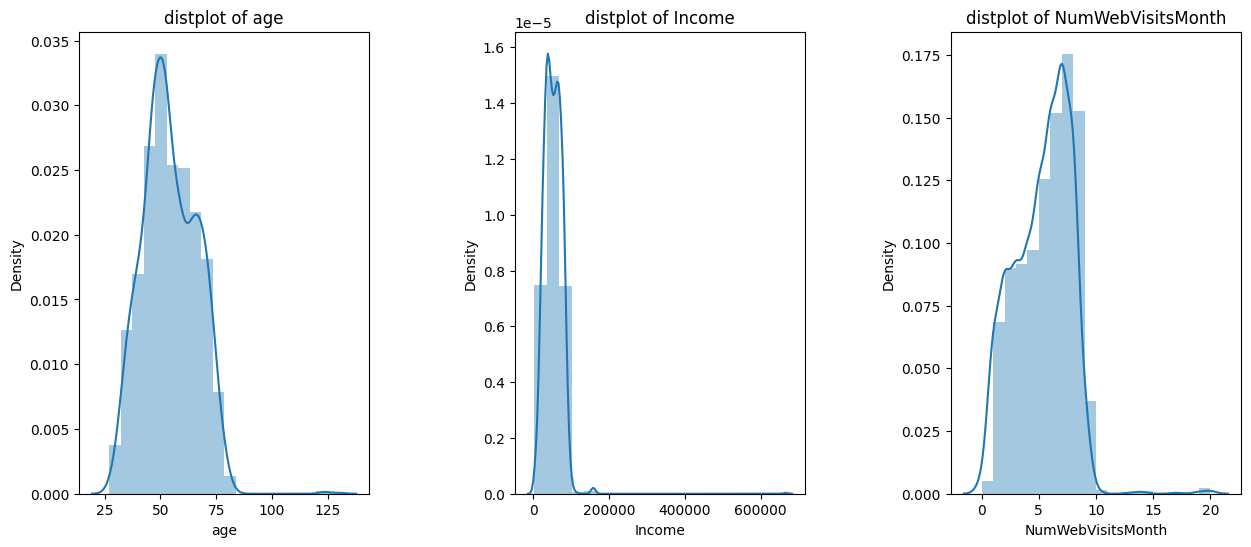

In [77]:
plt.figure(1, figsize=(15,6))
n=0
for x in ['age', 'Income', 'NumWebVisitsMonth']:
    n += 1
    plt.subplot(1, 3, n)
    plt.subplots_adjust(hspace=0.5, wspace=0.5)
    sns.distplot(df[x], bins=20)
    plt.title('distplot of {}'.format(x))
plt.show()

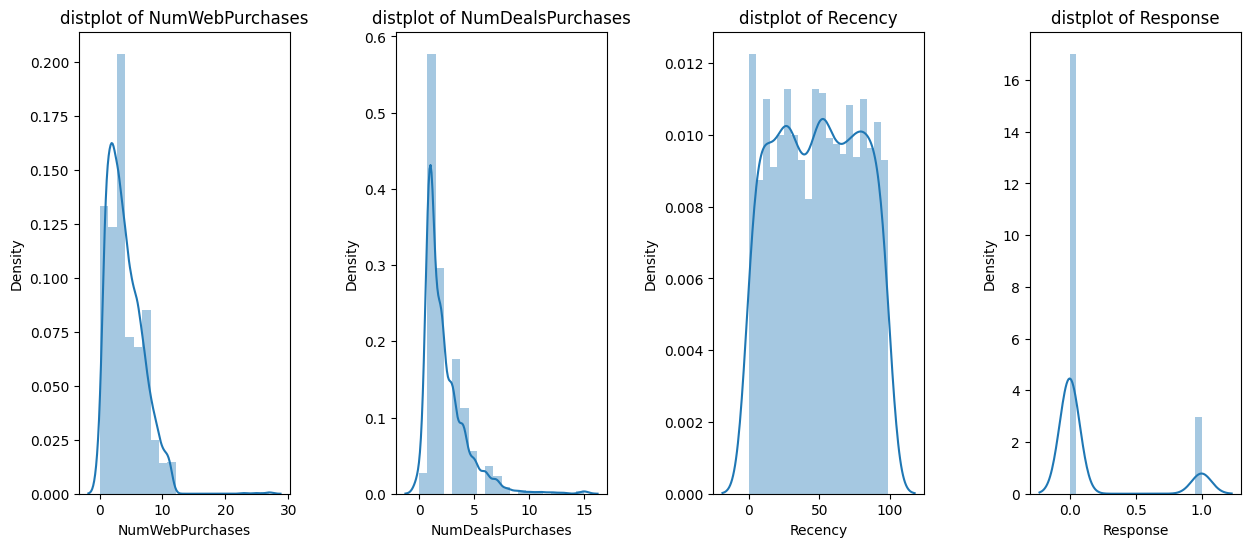

In [78]:
plt.figure(1, figsize=(15,6))
n=0
for x in ['NumWebPurchases', 'NumDealsPurchases', 'Recency', 'Response']:
    n += 1
    plt.subplot(1, 4, n)
    plt.subplots_adjust(hspace=0.5, wspace=0.5)
    sns.distplot(df[x], bins=20)
    plt.title('distplot of {}'.format(x))
plt.show()

In [79]:
from sklearn import preprocessing

# Loop over each column in the DataFrame where dtype is 'object'
for col in df.select_dtypes(include=['object']).columns:

    # Initialize a LabelEncoder object
    label_encoder = preprocessing.LabelEncoder()

    # Fit the encoder to the unique values in the column
    label_encoder.fit(df[col].unique())

    # Transform the column using the encoder
    df[col] = label_encoder.transform(df[col])

    # Print the column name and the unique encoded values
    print(f"{col}: {df[col].unique()}")

Education: [2 4 0 3 1]
Marital_Status: [1 3 2 4 5 0]


In [80]:
from sklearn.model_selection import train_test_split
# Select the features (X) and the target variable (y)
X = df.drop('Response', axis=1)
y = df['Response']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [81]:
from sklearn.naive_bayes import MultinomialNB
clf = MultinomialNB()
clf.fit(X_train, y_train)

MultinomialNB()

In [82]:
clf.score(X_test, y_test)

0.6629464285714286

In [83]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
dtree = DecisionTreeClassifier(class_weight='balanced')
param_grid = {
    'max_depth': [3, 4, 5, 6, 7, 8],
    'min_samples_split': [2, 3, 4],
    'min_samples_leaf': [1, 2, 3, 4],
    'random_state': [0, 42]
}

# Perform a grid search with cross-validation to find the best hyperparameters
grid_search = GridSearchCV(dtree, param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Print the best hyperparameters
print(grid_search.best_params_)

{'max_depth': 8, 'min_samples_leaf': 1, 'min_samples_split': 2, 'random_state': 0}


In [ ]:
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier(random_state=0, max_depth=8, min_samples_leaf=1, min_samples_split=3, class_weight='balanced')
dtree.fit(X_train, y_train)

In [ ]:
from sklearn.metrics import accuracy_score
y_pred = dtree.predict(X_test)
print("Accuracy Score :", round(accuracy_score(y_test, y_pred)*100 ,2), "%")

In [86]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, jaccard_score, log_loss
print('F-1 Score : ',(f1_score(y_test, y_pred, average='micro')))
print('Precision Score : ',(precision_score(y_test, y_pred, average='micro')))
print('Recall Score : ',(recall_score(y_test, y_pred, average='micro')))
print('Jaccard Score : ',(jaccard_score(y_test, y_pred, average='micro')))
print('Log Loss : ',(log_loss(y_test, y_pred)))

F-1 Score :  0.7857142857142857
Precision Score :  0.7857142857142857
Recall Score :  0.7857142857142857
Jaccard Score :  0.6470588235294118
Log Loss :  7.723640011953676


It has a flexible shape like Bionominal distribution.

so we can say that it is good in viewing expect the up and down of market time to time.

We can find some of our loyal customer's and them who are buying much then other's.

**Deliverables**:

- **Determination of suitable probability distributions for relevant variables and corresponding calculated probabilities and expected values.**:

  

## Task 4: Insights and Customer Segmentation 📈

- **Explore relationships between customer characteristics and spending habits. Segment customers based on their behaviors and characteristics.**

In [87]:
df["Total_purchases"] = df["MntWines"] + df["MntFruits"] + df["MntMeatProducts"] + df["MntFishProducts"] + df["MntSweetProducts"] + df["MntGoldProds"]

In [88]:
df.head()

Year_Birth  Education  Marital_Status   Income  Kidhome  Teenhome  Recency  \
0        1970          2               1  84835.0        0         0        0   
1        1961          2               3  57091.0        0         0        0   
2        1958          2               2  67267.0        0         1        0   
3        1967          2               4  32474.0        1         1        0   
4        1989          2               3  21474.0        1         0        0   

   MntWines  MntFruits  MntMeatProducts  ...  MntGoldProds  NumDealsPurchases  \
0       189        104              379  ...           218                  1   
1       464          5               64  ...            37                  1   
2       134         11               59  ...            30                  1   
3        10          0                1  ...             0                  1   
4         6         16               24  ...            34                  2   

   NumWebPurchases  NumCatalogPurchases  NumStorePurchases  NumWebVisitsMonth  \
0                4                    4                  6                  1   
1                7                    3                  7                  5   
2                3                    2                  5                  2   
3                1                    0                  2                  7   
4                3                    1                  2                  7   

   Response  Complain  age  Total_purchases  
0         1         0   53             1190  
1         1         0   62              577  
2         0         0   65              251  
3         0         0   56               11  
4         1         0   34               91  

[5 rows x 22 columns]

In [89]:
df.isnull().sum()

Year_Birth             0
Education              0
Marital_Status         0
Income                 0
Kidhome                0
Teenhome               0
Recency                0
MntWines               0
MntFruits              0
MntMeatProducts        0
MntFishProducts        0
MntSweetProducts       0
MntGoldProds           0
NumDealsPurchases      0
NumWebPurchases        0
NumCatalogPurchases    0
NumStorePurchases      0
NumWebVisitsMonth      0
Response               0
Complain               0
age                    0
Total_purchases        0
dtype: int64

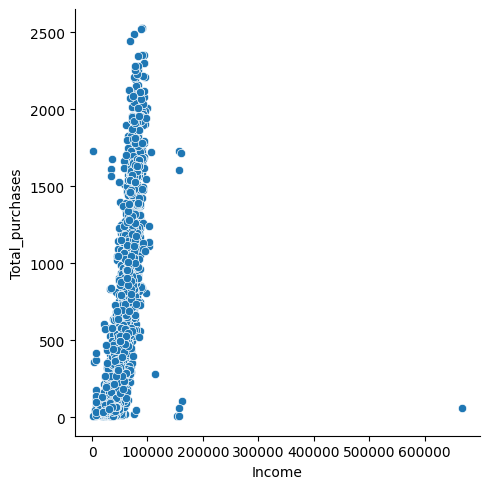

In [90]:
sns.relplot(x = 'Income', y= 'Total_purchases', data = df)

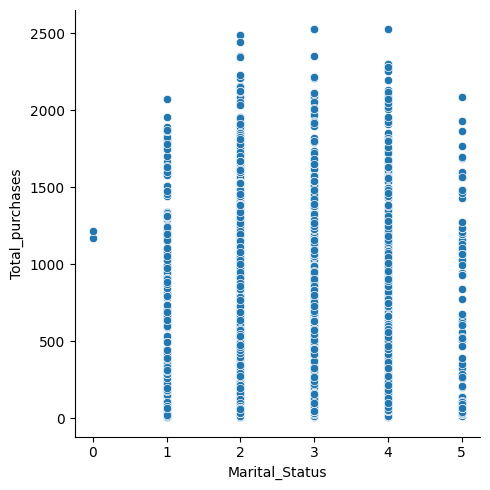

In [91]:
sns.relplot(x='Marital_Status', y='Total_purchases', data=df)

In [ ]:
sns.relplot(x='age', y='Total_purchases', data=df)

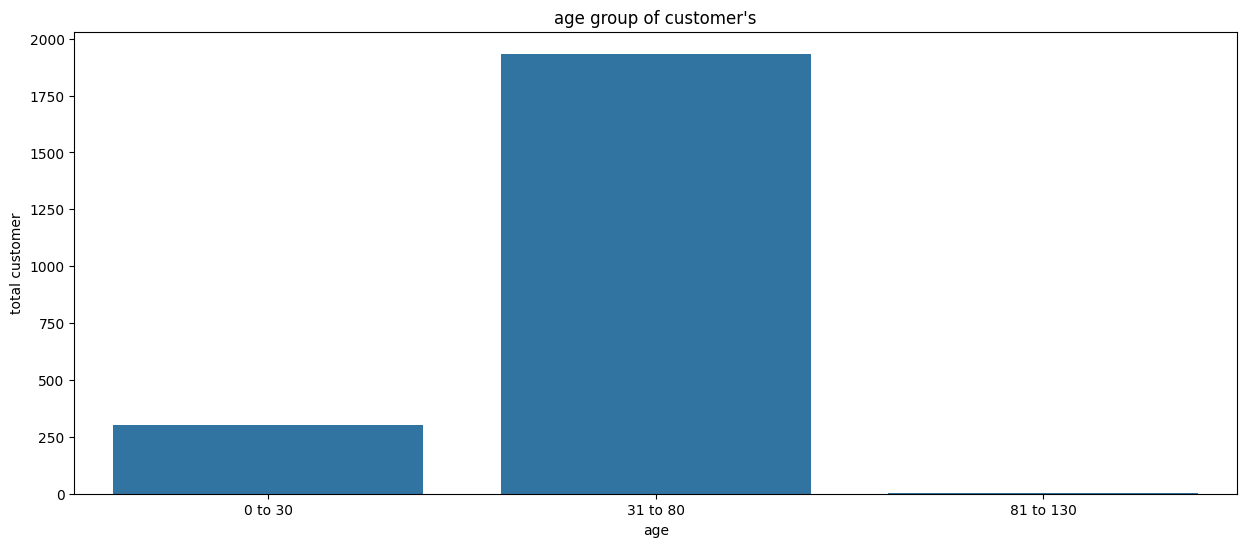

In [93]:
a0_40 = df['age'][(df['age']>0)&(df['age']<=40)]
a41_80 = df['age'][(df['age']>=41)&(df['age']<=80)]
a81_130 = df['age'][(df['age']>=81)&(df['age']<=130)]

ax = ["0 to 30", "31 to 80", "81 to 130"]
ay = [len(a0_40.values), len(a41_80.values), len(a81_130.values)]

plt.figure(figsize=(15,6))
sns.barplot(x=ax, y=ay)
plt.title("age group of customer's")
plt.xlabel("age")
plt.ylabel("total customer")
plt.show()

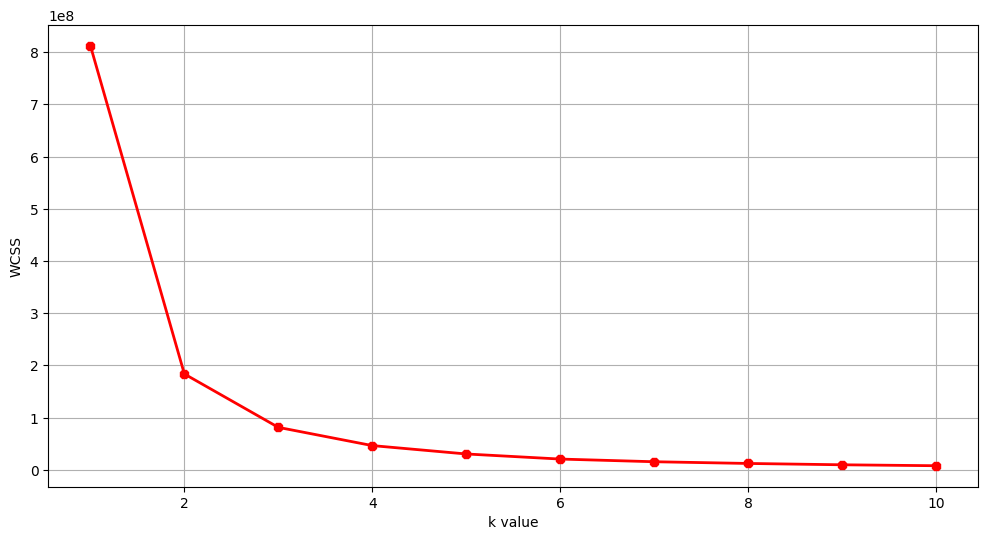

In [94]:
x1 = df.loc[:, ["age", "Total_purchases"]].values

from sklearn.cluster import KMeans
WCSS=[]
for k in range(1,11):
  kmeans = KMeans(n_clusters=k, init ="k-means++")
  kmeans.fit(x1)
  WCSS.append(kmeans.inertia_)
plt.figure(figsize=(12,6))
plt.grid()
plt.plot(range(1,11), WCSS, linewidth=2, color="red", marker="8")
plt.xlabel("k value")
plt.ylabel("WCSS")
plt.show()

In [95]:
kmeans = KMeans(n_clusters = 3)

labels = kmeans.fit_predict(x1)

print(labels)

[1 1 0 ... 0 2 1]


In [96]:
print(kmeans.cluster_centers_)

[[  52.82061369  152.56176239]
 [  56.6490939   920.14003295]
 [  54.90055249 1670.04696133]]


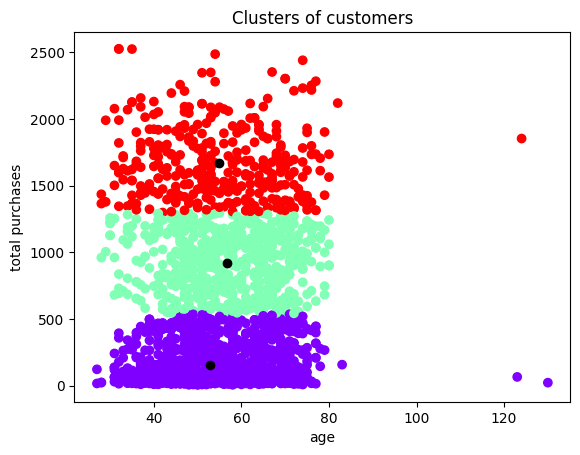

In [97]:
plt.scatter(x1[:,0], x1[:,1], c=kmeans.labels_, cmap='rainbow')
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], color='black')
plt.title('Clusters of customers')
plt.xlabel('age')
plt.ylabel('total purchases')
plt.show()

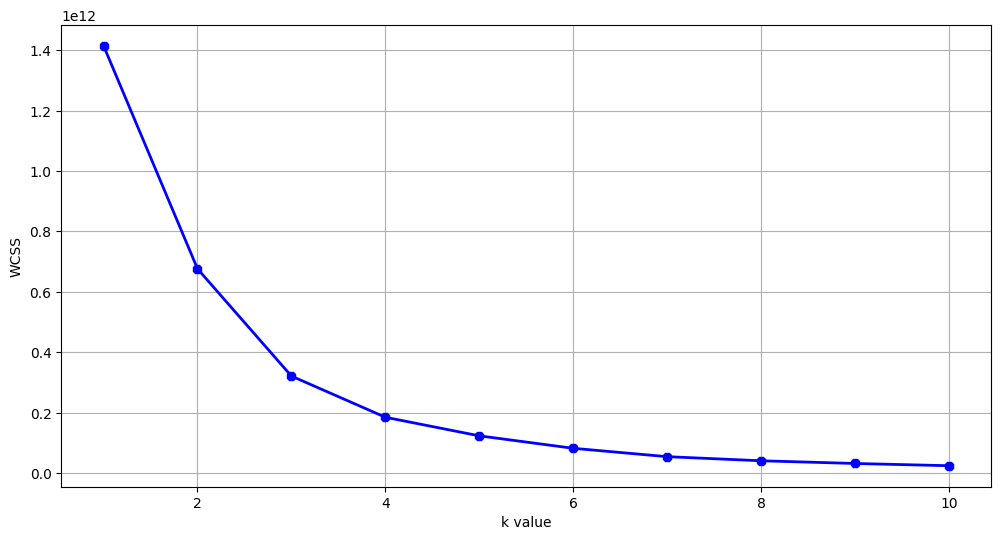

In [98]:
x2 = df.loc[:, ["Income", "Total_purchases"]].values

from sklearn.cluster import KMeans
WCSS=[]
for k in range(1,11):
  kmeans = KMeans(n_clusters=k, init ="k-means++")
  kmeans.fit(x2)
  WCSS.append(kmeans.inertia_)
plt.figure(figsize=(12,6))
plt.grid()
plt.plot(range(1,11), WCSS, linewidth=2, color="blue", marker="8")
plt.xlabel("k value")
plt.ylabel("WCSS")
plt.show()

In [99]:
kmeans = KMeans(n_clusters = 4)

labels = kmeans.fit_predict(x2)

print(labels)

[0 3 0 ... 3 0 0]


In [100]:
print(kmeans.cluster_centers_)

[[7.69206432e+04 1.27527338e+03]
 [2.84102212e+04 1.02470199e+02]
 [6.66666000e+05 6.20000000e+01]
 [5.23553473e+04 4.98410646e+02]]


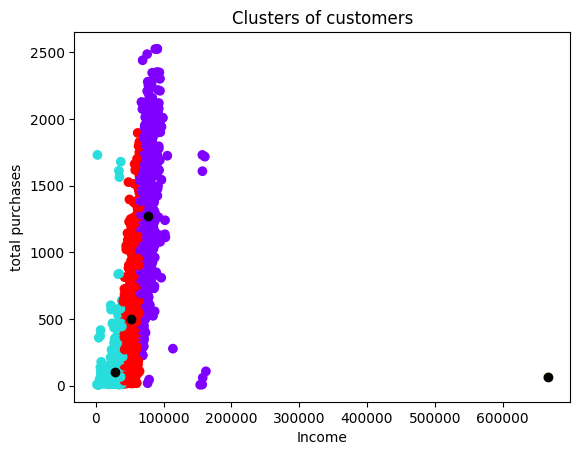

In [101]:
plt.scatter(x2[:,0], x1[:,1], c=kmeans.labels_, cmap='rainbow')
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], color='black')
plt.title('Clusters of customers')
plt.xlabel('Income')
plt.ylabel('total purchases')
plt.show()

**Deliverables**:

- **Key insights regarding relationships between variables and distinct customer segments based on behaviors.**

  

## Task 5: Conclusion and Recommendations

- **Create clear visualizations to showcase your findings. Use insights to make recommendations for the company based on your analysis.**

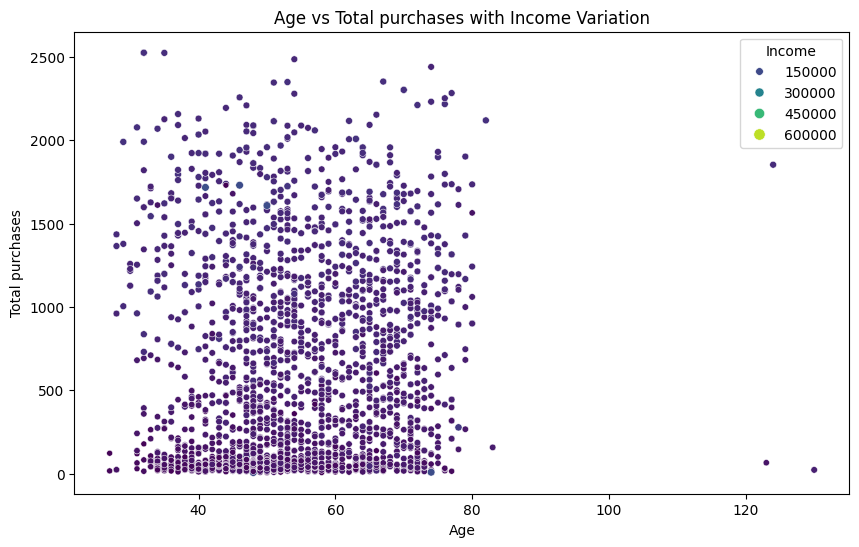

In [102]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='age', y='Total_purchases', data=df, hue='Income', palette='viridis', size='Income')
plt.title('Age vs Total purchases with Income Variation')
plt.xlabel('Age')
plt.ylabel('Total purchases')
plt.legend(title='Income')
plt.show()


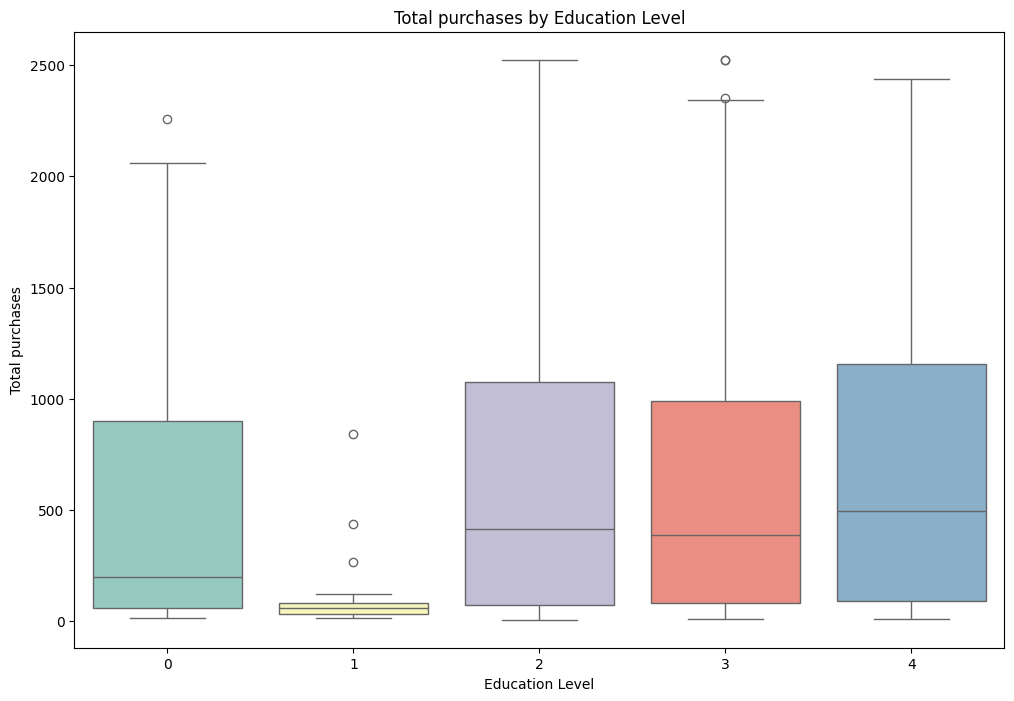

In [103]:
# Box plot of Spending Amount by Education Level
plt.figure(figsize=(12, 8))
sns.boxplot(x='Education', y='Total_purchases', data=df, palette='Set3')
plt.title('Total purchases by Education Level')
plt.xlabel('Education Level')
plt.ylabel('Total purchases')
plt.show()


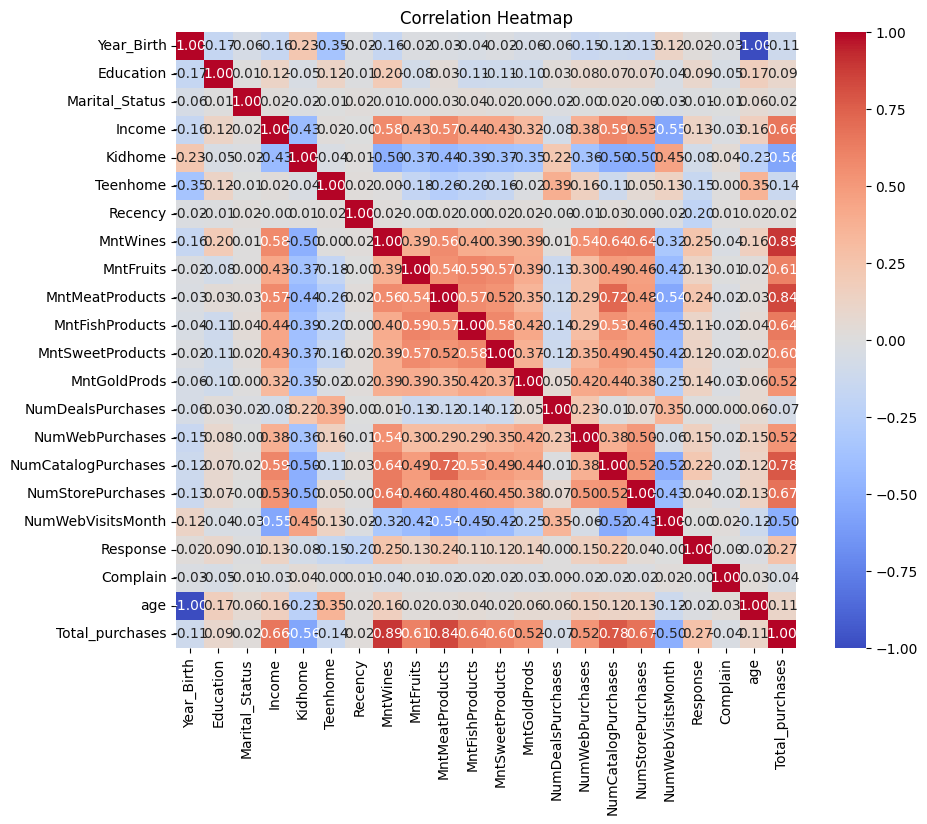

In [104]:
# Correlation heatmap
correlation_matrix = df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()


In [ ]:
# K-means clustering for segmentation
from sklearn.cluster import KMeans

# Assuming you have selected features for clustering
features_for_clustering = ['age', 'Income', 'Total_purchases']

# Fit K-means clustering
kmeans = KMeans(n_clusters=3, random_state=42)
df['cluster'] = kmeans.fit_predict(df[features_for_clustering])

# Pairplot for clustered segments
sns.pairplot(df, hue='cluster', palette='viridis', plot_kws={'alpha': 0.5})
plt.suptitle('Pairplot of Clustered Segments', y=1.02)
plt.show()


In [ ]:
imp_df = pd.DataFrame({
    "Feature Name": X_train.columns,
    "Importance": dtree.feature_importances_
})
fi = imp_df.sort_values(by="Importance", ascending=False)

fi2 = fi.head(10)
plt.figure(figsize=(10,8))
sns.barplot(data=fi2, x='Importance', y='Feature Name')
plt.title('Top 10 Feature Importance Each Attributes (Decision Tree)', fontsize=18)
plt.xlabel ('Importance', fontsize=16)
plt.ylabel ('Feature Name', fontsize=16)
plt.show()

In [ ]:
pip install shap

In [ ]:
import shap
explainer = shap.TreeExplainer(dtree)
shap_values = explainer.shap_values(X_test)
shap.summary_plot(shap_values, X_test)

In [ ]:
# compute SHAP values
explainer = shap.TreeExplainer(dtree)
shap_values = explainer.shap_values(X_test)
shap.summary_plot(shap_values[1], X_test.values, feature_names = X_test.columns)

In [ ]:
# compute SHAP values
explainer = shap.TreeExplainer(dtree)
shap_values = explainer.shap_values(X_test)
shap.summary_plot(shap_values[1], X_test.values, feature_names = X_test.columns, plot_type="violin")

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5,5))
sns.heatmap(data=cm,linewidths=.5, annot=True,  cmap = 'Blues')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
all_sample_title = 'Accuracy Score for Decision Tree: {0}'.format(dtree.score(X_test, y_test))
plt.title(all_sample_title, size = 15)

In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score
y_pred_proba = dtree.predict_proba(X_test)[:][:,1]

df_actual_predicted = pd.concat([pd.DataFrame(np.array(y_test), columns=['y_actual']), pd.DataFrame(y_pred_proba, columns=['y_pred_proba'])], axis=1)
df_actual_predicted.index = y_test.index

fpr, tpr, tr = roc_curve(df_actual_predicted['y_actual'], df_actual_predicted['y_pred_proba'])
auc = roc_auc_score(df_actual_predicted['y_actual'], df_actual_predicted['y_pred_proba'])

plt.plot(fpr, tpr, label='AUC = %0.4f' %auc)
plt.plot(fpr, fpr, linestyle = '--', color='k')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve', size = 15)
plt.legend()

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
rfc = RandomForestClassifier(class_weight='balanced')
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [None, 5, 10],
    'max_features': ['sqrt', 'log2', None],
    'random_state': [0, 42]
}

# Perform a grid search with cross-validation to find the best hyperparameters
grid_search = GridSearchCV(rfc, param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Print the best hyperparameters
print(grid_search.best_params_)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(random_state=42, max_features='sqrt', n_estimators=200, class_weight='balanced')
rfc.fit(X_train, y_train)

In [ ]:
y_pred = rfc.predict(X_test)
print("Accuracy Score :", round(accuracy_score(y_test, y_pred)*100 ,2), "%")

In [ ]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, jaccard_score, log_loss
print('F-1 Score : ',(f1_score(y_test, y_pred, average='micro')))
print('Precision Score : ',(precision_score(y_test, y_pred, average='micro')))
print('Recall Score : ',(recall_score(y_test, y_pred, average='micro')))
print('Jaccard Score : ',(jaccard_score(y_test, y_pred, average='micro')))
print('Log Loss : ',(log_loss(y_test, y_pred)))

In [ ]:

imp_df = pd.DataFrame({
    "Feature Name": X_train.columns,
    "Importance": rfc.feature_importances_
})
fi = imp_df.sort_values(by="Importance", ascending=False)

fi2 = fi.head(10)
plt.figure(figsize=(10,8))
sns.barplot(data=fi2, x='Importance', y='Feature Name')
plt.title('Top 10 Feature Importance Each Attributes (Random Forest)', fontsize=18)
plt.xlabel ('Importance', fontsize=16)
plt.ylabel ('Feature Name', fontsize=16)
plt.show()

In [ ]:
import shap
explainer = shap.TreeExplainer(rfc)
shap_values = explainer.shap_values(X_test)
shap.summary_plot(shap_values, X_test)

In [ ]:

# compute SHAP values
explainer = shap.TreeExplainer(rfc)
shap_values = explainer.shap_values(X_test)
shap.summary_plot(shap_values[1], X_test.values, feature_names = X_test.columns)

In [ ]:

# compute SHAP values
explainer = shap.TreeExplainer(rfc)
shap_values = explainer.shap_values(X_test)
shap.summary_plot(shap_values[1], X_test.values, feature_names = X_test.columns, plot_type="violin")

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5,5))
sns.heatmap(data=cm,linewidths=.5, annot=True,  cmap = 'Blues')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
all_sample_title = 'Accuracy Score for Random Forest: {0}'.format(rfc.score(X_test, y_test))
plt.title(all_sample_title, size = 15)

In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score
y_pred_proba = rfc.predict_proba(X_test)[:][:,1]

df_actual_predicted = pd.concat([pd.DataFrame(np.array(y_test), columns=['y_actual']), pd.DataFrame(y_pred_proba, columns=['y_pred_proba'])], axis=1)
df_actual_predicted.index = y_test.index

fpr, tpr, tr = roc_curve(df_actual_predicted['y_actual'], df_actual_predicted['y_pred_proba'])
auc = roc_auc_score(df_actual_predicted['y_actual'], df_actual_predicted['y_pred_proba'])

plt.plot(fpr, tpr, label='AUC = %0.4f' %auc)
plt.plot(fpr, fpr, linestyle = '--', color='k')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve', size = 15)
plt.legend()

**Deliverables**:

- **Well-designed visualizations that visually represent your insights and actionable recommendations based on customer behavior analysis.**

## Bonus Task - Geogebra Experiment



Here's the link to an intriguing GeoGebra experiment: [GeoGebra Experiment Link](https://www.geogebra.org/m/LZbwMZtJ)

This experiment lets you simulate coin flips as per your preferences and specifications!

Your task involves recording a video where you'll explain the concept of the **Law of Large Numbers** using this experiment. Dive further into the experience by adjusting the number of coins and exploring varying coin biases. 🪙📹🔍